In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from calendar import monthrange

In [2]:
raw = pd.read_csv("h:\\MyProj\\Courcera\\Ml-mipt\\course5\\week1a\\work\\monthly-milk-production.csv", sep=";", index_col=False) 
raw.head()

,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


In [3]:
#monthrange(raw['month'][0][6:10]) 
#(raw['month'])[4:7][4:7]
def days_in_month(values):
    result = []
    for value in values :
        day, days = monthrange(int(value[6:10]), int(value[3:5]))
        result.append(days)
    return result

In [4]:
zz = raw['milk']/days_in_month(raw['month'])
zz

0      19.000000
1      20.035714
2      20.645161
3      21.866667
4      23.451613
         ...    
163    27.677419
164    27.233333
165    26.677419
166    26.566667
167    27.193548
Name: milk, Length: 168, dtype: float64

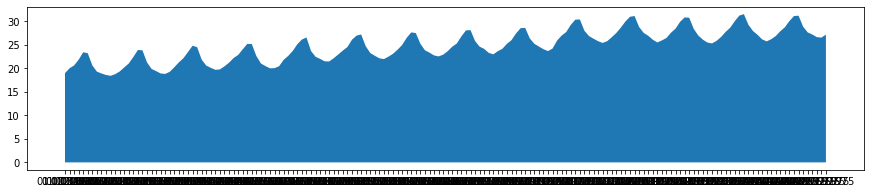

In [5]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.stackplot(raw['month'], raw['milk']/days_in_month(raw['month'])) #, labels=['Eastasia', 'Eurasia', 'Oceania'])
#ax.stackplot(year_month(raw['month']), raw['milk']) #, labels=['Eastasia', 'Eurasia', 'Oceania'])
#ax.set_xlim(xmin=raw['month'][0], xmax=raw['month'][-1])
plt.show()

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [6]:
raw['daily'] = raw['milk']/days_in_month(raw['month'])
daily_diff1 = raw.daily - raw.daily.shift(1)
daily_diff1[1:]

1      1.035714
2      0.609447
3      1.221505
4      1.584946
5     -0.218280
         ...   
163   -1.225806
164   -0.444086
165   -0.555914
166   -0.110753
167    0.626882
Name: daily, Length: 167, dtype: float64

In [7]:
sm.tsa.stattools.adfuller(daily_diff1[1:])

(-2.759469476228923,
 0.06430054654174505,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [8]:
daily_diff12 = raw.daily - raw.daily.shift(12)
sm.tsa.stattools.adfuller(daily_diff12[12:])

(-2.1594860932888085,
 0.22127672658830344,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [9]:
daily_diff12x = daily_diff12[12:]
daily_diff1x = daily_diff12x - daily_diff12x.shift(1)
#daily_diff1x[1:]
sm.tsa.stattools.adfuller(daily_diff1x[1:])

(-5.4813263347969245,
 2.280845551803768e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.905137509892256)

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

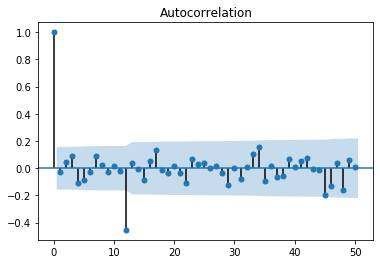

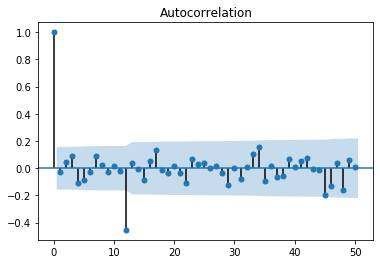

In [10]:
sm.graphics.tsa.plot_acf(daily_diff1x[1:].values.squeeze(), lags=50)

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

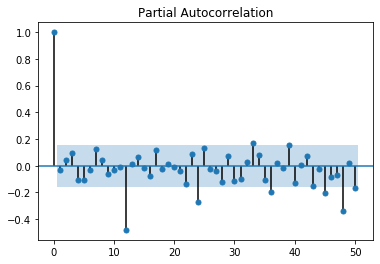

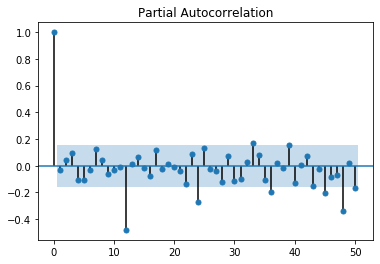

In [17]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(daily_diff1x[1:].values.squeeze(), lags=50)